In [1]:
import numpy as np

In [2]:
# Tạo dữ liệu
X = np.array([[1, 2], [2, 3], [3, 1], [2, 5], [4, 3]])
Y = np.array([1, 1, 1, 0, 0])  # nhãn

# Thêm cột bias (hàng đơn vị 1s) vào X
X = np.hstack((np.ones((X.shape[0], 1)), X))  # X giờ là m x (n+1)
X

array([[1., 1., 2.],
       [1., 2., 3.],
       [1., 3., 1.],
       [1., 2., 5.],
       [1., 4., 3.]])

In [3]:
# Hàm sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [4]:
# Hàm mất mát (log-likelihood hay cross-entropy loss)
def loss(theta):
    L = 0
    for x, y in zip(X, Y):
        if y == 0:
            L += - np.log(1 - sigmoid(np.dot(theta, x)))
        else:
            L += - np.log(sigmoid(np.dot(theta, x)))
    return L / len(Y)


In [5]:
# Hàm tính gradient của hàm mất mát
def gradient(theta):
    G = 0  # mặc dù là số nhưng sau khi thực hiện vòng lặp lại là véctơ
    for x, y in zip(X, Y):
        G += (sigmoid(np.dot(theta, x)) - y) * x
    return G / len(Y)

In [6]:
from scipy.optimize import minimize

In [8]:
# Khởi tạo các tham số
initial_theta = np.zeros(X.shape[1])  # vector tham số ban đầu với kích thước (n+1)
# Sử dụng scipy.optimize.minimize để tối ưu hóa hàm mất mát
result = minimize(loss, initial_theta, method='BFGS', jac=gradient)
result

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.39804740936585e-06
        x: [ 8.653e+01 -1.303e+01 -1.637e+01]
      nit: 24
      jac: [-2.230e-06 -4.293e-06 -6.690e-06]
 hess_inv: [[ 6.837e+06 -1.104e+06 -1.215e+06]
            [-1.104e+06  1.784e+05  1.962e+05]
            [-1.215e+06  1.962e+05  2.158e+05]]
     nfev: 25
     njev: 25

In [9]:
theta = result.x
theta

array([ 86.5346514 , -13.02613582, -16.37178228])

In [10]:
# Dự đoán nhãn cho điểm mới (1, 4)
x_pred = np.array([1, 1, 4])  # thêm 1 cho bias
prob_pred = sigmoid(np.dot(theta, x_pred))
prob_pred

0.9996717433521698

In [11]:
y_pred = 1 if prob_pred >= 0.5 else 0
y_pred

1

In [12]:
a = - theta[1] / theta[2]
b = - theta[0] / theta[2]
a, b

(-0.7956455563206166, 5.285597495996024)

In [13]:
import matplotlib.pyplot as plt

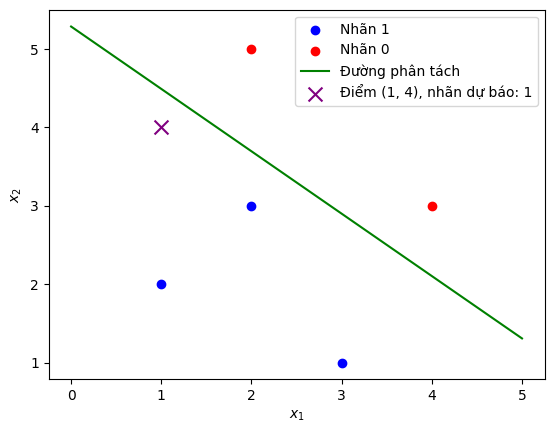

In [14]:
# Trực quan hóa các điểm và đường phân tách
plt.figure()

# (1) Vẽ các điểm gán nhãn 1
plt.scatter(X[Y == 1][:, 1], X[Y == 1][:, 2], color='blue', label='Nhãn 1')

# (2) Vẽ các điểm gán nhãn 0
plt.scatter(X[Y == 0][:, 1], X[Y == 0][:, 2], color='red', label='Nhãn 0')

# (3) Xây dựng đường phân tách
X1 = np.linspace(0, 5, 100)
X2 = a * X1 + b
plt.plot(X1, X2, label='Đường phân tách', color='green')

# (4) Vẽ điểm mới (1, 4) với nhãn dự báo
plt.scatter(x_pred[1], x_pred[2], color='purple', marker='x', s=100, label=f'Điểm (1, 4), nhãn dự báo: {y_pred}')

# Đặt tên trục và tiêu đề
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [26]:
# Hàm mất mát và gradient của nó theo tham khảo ChatGPT

# Hàm mất mát (log-likelihood hay cross-entropy loss)
def compute_loss(theta, X, Y):
    m = len(Y)
    h = sigmoid(np.dot(X, theta))
    epsilon = 1e-5  # thêm để tránh log(0)
    loss = -1/m * (np.dot(Y, np.log(h + epsilon)) + np.dot((1 - Y), np.log(1 - h + epsilon)))
    return loss

# Hàm tính gradient của hàm mất mát
def compute_gradient(theta, X, Y):
    m = len(Y)
    h = sigmoid(np.dot(X, theta))
    gradient = np.dot(X.T, (h - Y)) / m
    return gradient
